# Table of Contents

* [CREDIT CARD CLASSIFICATION](#casestudy)
* [EDA](#eda)
* [MULTICOLLINEARITY](#multicollinearity)
* [DROPPING COLUMNS](#DroppingCol)
* [BINNING USING Q-CUTS](#qcut)
* [OUTLIERS](#outliers)
* [BOX PLOTS](#boxplots)
* [PRE-PROCESSING](#preprocessing)
* [SPLITTING DATA THE TRAIN/TEST](#ttsplit)
* [MACHINE LEARNING MODELS](#applymoded)
* [MODEL 1 : LOGISTIC REGRESSION](#M1)
* [MODEL 2 : RANDOMN FOREST CLASSIFIER](#M2)
* [MODEL 3 : GAUSSIAN NB](#M3)
* [SMOTE](#smote)
* [MODEL 1 : LOGISTIC REGRESSION](#SM1)
* [MODEL 2 : RANDOMN FOREST CLASSIFIER](#SM2)
* [MODEL 3 : GAUSSIAN NB](#SM3)
* [VALIDATION](#V)
* [CONCLUSION](#V)


## Case study classification project <a class="anchor" id="casestudy"></a>

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [2]:
df = pd.read_excel('creditcardmarketing.xlsx')

###  EDA  <a class="anchor" id="eda"></a>

**STANDARDISE THE COLUMNS**

In [3]:
# standerdize the readers: replace spaces by _, put in lowercase, remove #
df.columns = df.columns.str.replace(' ', '_')
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace('#_', '')


**FILL MISSING VALUES WITH MEAN VALUES**

We found few missing values (less than 20%). so we are not droping them.

Since the balances columns are float, we will fill them with the mean

In [4]:
# q1_balance
mean_q2_balance = df['q1_balance'].mean()
df['q1_balance'] = df['q1_balance'].fillna(mean_q2_balance)
df['q1_balance'] = pd.to_numeric(df['q1_balance'], errors = 'coerce')
#q2_balance
mean_q2_balance = df['q2_balance'].mean()
df['q2_balance'] = df['q2_balance'].fillna(mean_q2_balance)
df['q2_balance'] = pd.to_numeric(df['q2_balance'], errors = 'coerce')
#q3_balance
mean_q3_balance = df['q3_balance'].mean()
df['q3_balance'] = df['q3_balance'].fillna(mean_q3_balance)
df['q3_balance'] = pd.to_numeric(df['q3_balance'], errors = 'coerce')
#q4_balance
mean_q4_balance = df['q4_balance'].mean()
df['q4_balance'] = df['q4_balance'].fillna(mean_q4_balance)
df['q4_balance'] = pd.to_numeric(df['q4_balance'], errors = 'coerce')


### MULTICOLLINEARITY  <a class="anchor" id="multicollinearity"></a>

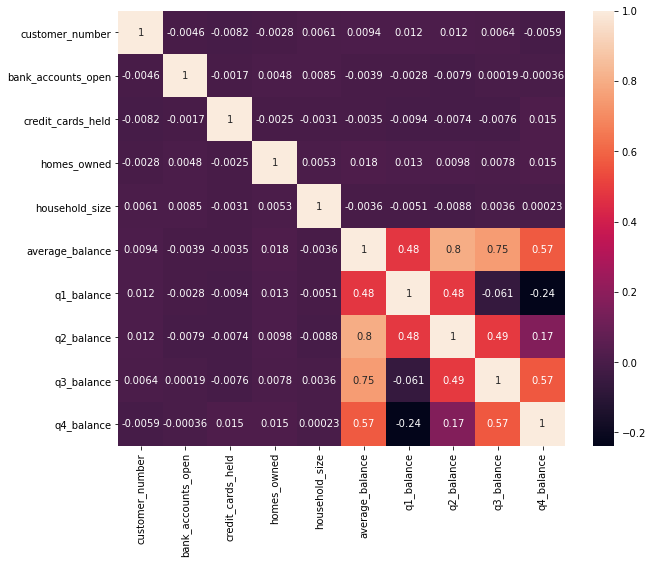

In [7]:
#check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

The graph proves the absence of multicollinearity. 

"The linear model makes the following assumptions
- Require a linear relationship between the dependent and independent variables.
- The error terms (residuals) need to be normally distributed. 
- If not weights can be introduced to penalize some observations in the error metric.
Independent variables are normally distributed.
If not (apply transformation Box-Cox)
- Absence of multicollinearity.
- Independent observations (not repeated)"

### DROPPING COLUMNS  <a class="anchor" id="DroppingCol"></a>

In [8]:
# Droppping the columns
df=df.drop(['customer_number','average_balance'], axis=1)
df.head(10)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,2140.0,1357.0,982.0,365.0
5,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1847.0,1365.0,750.0,497.0
6,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,468.0,188.0,347.0,132.0
7,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,132.0,391.0,285.0,306.0
8,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,894.0,891.0,882.0,1353.0
9,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,1814.0,1454.0,514.0,115.0


In [9]:
df.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home',
       'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

###  BINNING USING Q-CUT <a class="anchor" id="qcut"></a>

In [11]:
df = df.groupby(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'own_your_home',
       'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'])['household_size'].sum().reset_index()

In [12]:
# Binning syntax - q cut
df['household_size'] = pd.qcut(df['household_size'],duplicates='drop', q=4)

In [13]:
df['household_size'].value_counts()

(0.999, 3.0]    9064
(3.0, 4.0]      5543
(4.0, 9.0]      3393
Name: household_size, dtype: int64

In [14]:
df

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance,household_size
0,No,Air Miles,Letter,High,1,No,High,1,1,No,11.0,1205.0,937.0,1059.0,"(0.999, 3.0]"
1,No,Air Miles,Letter,High,1,No,High,1,1,No,351.0,15.0,436.0,154.0,"(0.999, 3.0]"
2,No,Air Miles,Letter,High,1,No,High,1,1,No,453.0,1250.0,1302.0,1052.0,"(0.999, 3.0]"
3,No,Air Miles,Letter,High,1,No,High,1,1,No,459.0,532.0,1211.0,1866.0,"(3.0, 4.0]"
4,No,Air Miles,Letter,High,1,No,High,1,1,No,467.0,284.0,284.0,151.0,"(0.999, 3.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Yes,Points,Postcard,Medium,2,No,Medium,3,1,Yes,683.0,978.0,1514.0,2029.0,"(4.0, 9.0]"
17996,Yes,Points,Postcard,Medium,2,Yes,Low,1,2,Yes,359.0,399.0,192.0,290.0,"(0.999, 3.0]"
17997,Yes,Points,Postcard,Medium,2,Yes,Low,2,1,No,109.0,1464.0,1615.0,754.0,"(3.0, 4.0]"
17998,Yes,Points,Postcard,Medium,2,Yes,Low,2,1,Yes,292.0,706.0,914.0,1330.0,"(4.0, 9.0]"


### OUTLIERS <a class="anchor" id="outliers"></a>

### BOX PLOTS - cleaned using IQRs<a class="anchor" id="boxplots"></a>
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

In [15]:
# find quartiles and clean up outliers
cols_outliers = ['q1_balance','q2_balance','q3_balance','q4_balance']

for col in cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('q1_balance of the column ', col,':', Q1)
    print('q2_balance of the column ', col,':', Q3)
    print('q3_balance of the column ', col,':', Q1)
    print('q4_balance of the column ', col,':', Q3)
    print('IRQ of the column ', col,':', IQR)
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    print('lower_whisker: ', Lower_Whisker, ',' , 'upper whisker: ', Upper_Whisker)
    #  Outlier Treatment 
    df = df[df[col]< Upper_Whisker]
    df = df[df[col]> Lower_Whisker]
    


q1_balance of the column  q1_balance : 393.0
q2_balance of the column  q1_balance : 1520.25
q3_balance of the column  q1_balance : 393.0
q4_balance of the column  q1_balance : 1520.25
IRQ of the column  q1_balance : 1127.25
lower_whisker:  -1297.875 , upper whisker:  3211.125
q1_balance of the column  q2_balance : 664.0
q2_balance of the column  q2_balance : 1342.0
q3_balance of the column  q2_balance : 664.0
q4_balance of the column  q2_balance : 1342.0
IRQ of the column  q2_balance : 678.0
lower_whisker:  -353.0 , upper whisker:  2359.0
q1_balance of the column  q3_balance : 633.0
q2_balance of the column  q3_balance : 1461.0
q3_balance of the column  q3_balance : 633.0
q4_balance of the column  q3_balance : 1461.0
IRQ of the column  q3_balance : 828.0
lower_whisker:  -609.0 , upper whisker:  2703.0
q1_balance of the column  q4_balance : 363.0
q2_balance of the column  q4_balance : 1210.0
q3_balance of the column  q4_balance : 363.0
q4_balance of the column  q4_balance : 1210.0
IRQ o

**CHECK THE BOXPLOTS**

<AxesSubplot:>

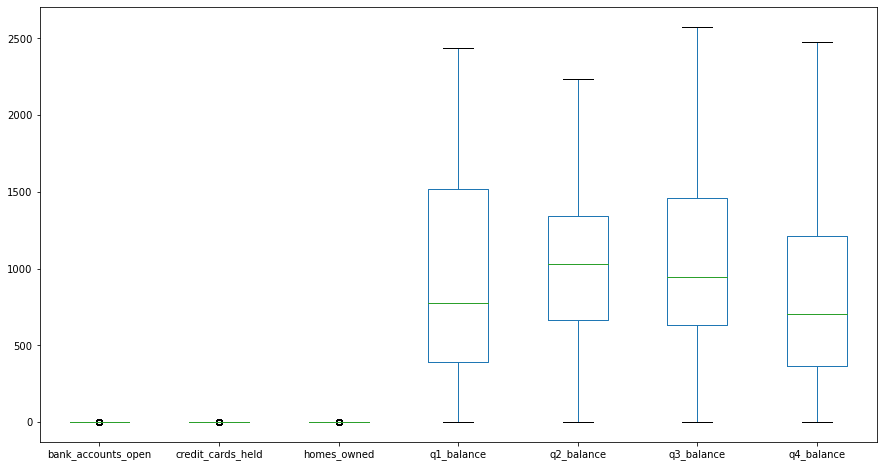

In [16]:
#check boxplots
df.boxplot(grid=False, figsize= (15,8))

**CHECK FOR MULTICOLLINEARITY**

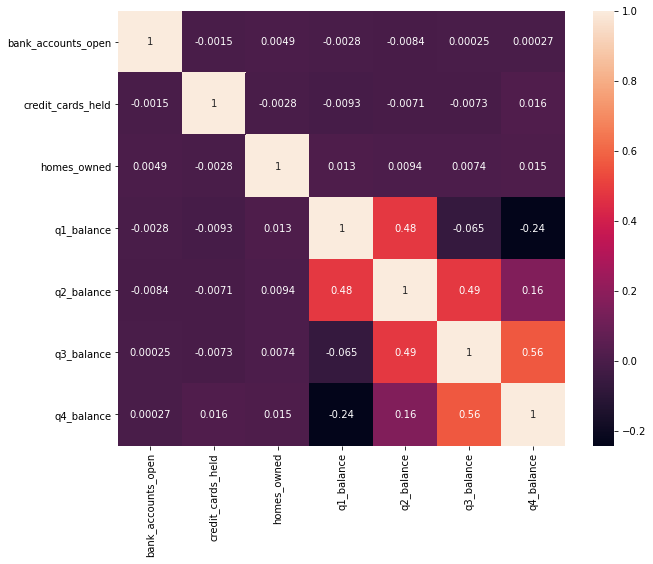

In [17]:
# # check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
# q1, q2 ,q3 have collinearity

### Numerical Columns

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable. It is a smoothed version of the histogram and is used in the same concept.

Kernel Density Estimation(KDE): Kernel density estimation is a really useful statistical tool with an intimidating name. Often shortened to KDE, it’s a technique that let’s you create a smooth curve given a set of data. Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis.

In [18]:
numerics = ['int64', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num

,bank_accounts_open,credit_cards_held,homes_owned,q1_balance,q2_balance,q3_balance,q4_balance
0,1,1,1,11.0,1205.0,937.0,1059.0
1,1,1,1,351.0,15.0,436.0,154.0
2,1,1,1,453.0,1250.0,1302.0,1052.0
3,1,1,1,459.0,532.0,1211.0,1866.0
4,1,1,1,467.0,284.0,284.0,151.0
...,...,...,...,...,...,...,...
17995,2,3,1,683.0,978.0,1514.0,2029.0
17996,2,1,2,359.0,399.0,192.0,290.0
17997,2,2,1,109.0,1464.0,1615.0,754.0
17998,2,2,1,292.0,706.0,914.0,1330.0


### Categorical Columns <a class="anchor" id="catergoricalCol"></a>


In [19]:
# reset index
df = df.reset_index(drop = True)

In [20]:
cat = df.select_dtypes(exclude = ['float64'])
cat_col=cat.columns.to_list()
cat_col

['offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'own_your_home',
 'household_size']

In [21]:
categorical = pd.get_dummies(cat, columns =['offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'own_your_home',
 'household_size'],drop_first=True)

### PRE - PROCESSING<a class="anchor" id="preprocessing"></a>

**NUMERICAL**

In [22]:
# numerical scaling 
from sklearn.preprocessing import Normalizer

In [23]:
# df_num are the numerical
# using 'bank_accounts_open', 'credit_cards_held', 'homes_owned' as categorical columns
X = df_num.drop(['bank_accounts_open', 'credit_cards_held', 'homes_owned'], axis=1)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised)

In [24]:
X_normalised


,0,1,2,3
0,0.005921,0.648600,0.504347,0.570015
1,0.604420,0.025830,0.750790,0.265187
2,0.211913,0.584750,0.609075,0.492125
3,0.196755,0.228047,0.519108,0.799880
4,0.736368,0.447813,0.447813,0.238097
...,...,...,...,...
17985,0.244053,0.349464,0.540990,0.725012
17986,0.561317,0.623860,0.300203,0.453432
17987,0.047205,0.634015,0.699408,0.326535
17988,0.163540,0.395408,0.511903,0.744891


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

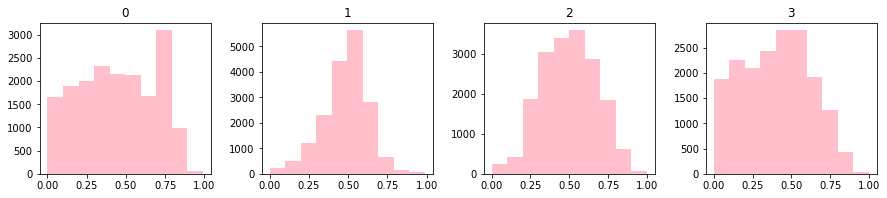

In [25]:
X_normalised.hist(figsize=(15,10),layout=(3,4), grid=False, color='pink')

### Split off the dependant variable (label) <a class="anchor" id="split"></a>

In [26]:
#sort out the categoricals 
y= categorical['offer_accepted_Yes']
categorical=categorical.drop(['offer_accepted_Yes'], axis=1)
#categorical

In [27]:
# bring the numerical data (scaled)in with the x cat
X = np.concatenate((X_normalised, categorical),axis=1)

### TRAIN/ TEST SET <a class="anchor" id="ttsplit"></a>

**TRAINING THE TEST SET**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

### Calling Library Functions

In [30]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
import math

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import sklearn.metrics as metrics

### METHOD 1 : LOGISTIC REGRESSION <a class="anchor" id="M1"></a>

### Evaluate accuracy and test <a class="anchor" id="evaluate"></a>

Logistic Regression:
The accuracy of the model on test set is:  0.9460811561978877
Kappa:  0.0
ROC-AUC score:  0.5
F1 score:  0.0
Confusion Matrix - raw:


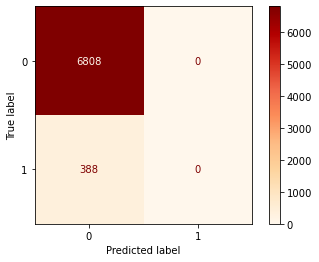

Confusion Matrix - normalised row-wise:


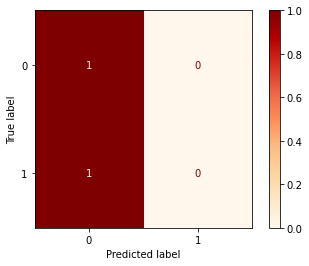

[LogisticRegression(), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)
print ("Logistic Regression:")
predictions = model.predict(X_test)

#calculate scores.
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))

#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "OrRd")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "OrRd")
plt.show() 
[model, predictions]

**VISUALISING** 

In [32]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

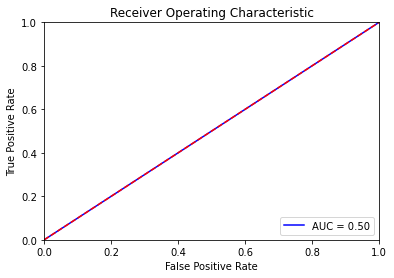

In [33]:
# method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION**

The dataset is highly imbalanced

### Model 2 : RandomForestClassifier <a class="anchor" id="M2"></a>

Random Forest:
The accuracy of the model on test set is:  0.9459421901056142
Kappa:  0.004291240945495711
ROC-AUC score:  0.5011417737773632
F1 score:  0.005115089514066497
Confusion Matrix - raw:


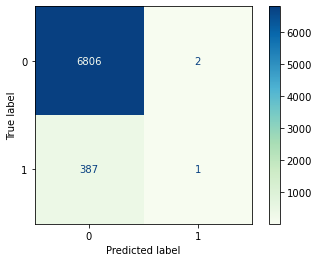

Confusion Matrix - normalised row-wise:


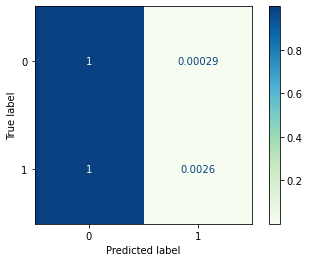

[RandomForestClassifier(), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print ("Random Forest:")
predictions = model.predict(X_test)

#calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))  
#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu")
plt.show() 
[model, predictions]

**VISUALISING** 

In [35]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

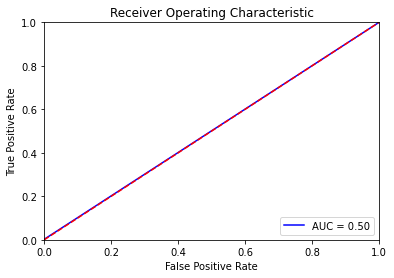

In [36]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model 3: GaussianNB <a class="anchor" id="M3"></a>

Gaussian NB:
The accuracy of the model on test set is:  0.943023902167871
Kappa:  0.028210729352491692
ROC-AUC score:  0.5081059881037469
F1 score:  0.03755868544600939
Confusion Matrix - raw:


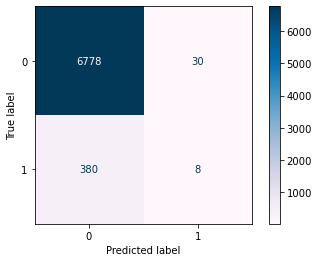

Confusion Matrix - normalised row-wise:


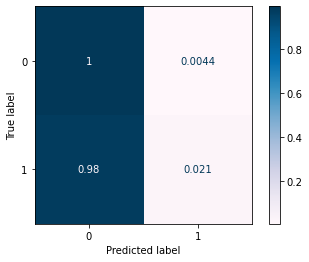

In [37]:
model = GaussianNB()
model.fit(X_train, y_train)
print ("Gaussian NB:")
predictions = model.predict(X_test)

#calculate scores. 
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))  
#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "PuBu")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "PuBu")
plt.show() 

In [38]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

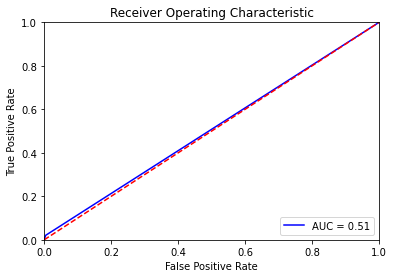

In [39]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SOLVING THE IMBALANCE WITH SMOTE <a class="anchor" id="smote"></a>

**SMOTE - oversample the minority class of the target label**

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smote = SMOTE()

In [42]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    16967
0    16967
Name: offer_accepted_Yes, dtype: int64

**TRAINING THE DATASET**

In [43]:
#re do train test split It2
X_train, X_test, y_train, y_test =train_test_split(X_sm, y_sm, test_size= 0.4, random_state=40)

# After SMOTE 

### Model 1: Logistic Regression<a class="anchor" id="SM1"></a>

Logistic Regression:
The accuracy of the model on test set is:  0.720421393841167
Kappa:  0.44072562304903107
ROC-AUC score:  0.7203286047425635
F1 score:  0.7253383513063618
Confusion Matrix - raw:


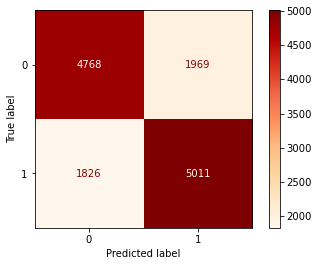

Confusion Matrix - normalised row-wise:


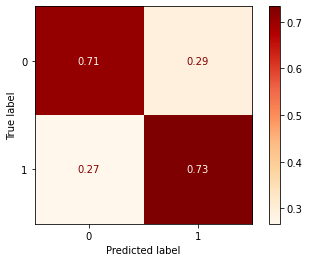

[LogisticRegression(), array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)]

In [44]:
# apply logistic Regression 
model = LogisticRegression()
model.fit(X_train, y_train)
print ("Logistic Regression:")
predictions = model.predict(X_test)

#calculate scores.
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))

#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "OrRd")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "OrRd")
plt.show() 
[model, predictions]

**VISUALISING**

In [45]:
# calculate the Auc
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

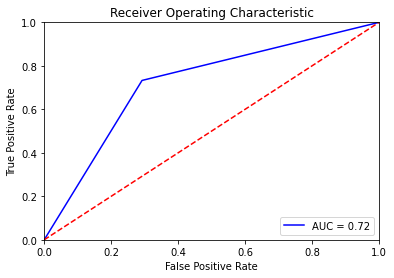

In [46]:
# method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION**

The Model imporved at predicting but the acuracy dropped to 72.04 %

### Model 2 : RandomForestClassifier <a class="anchor" id="SM2"></a>

Random Forest:
The accuracy of the model on test set is:  0.9504199204361279
Kappa:  0.9008186323394745
ROC-AUC score:  0.9503374436986848
F1 score:  0.9513059836480717
Confusion Matrix - raw:


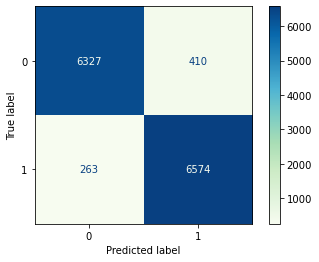

Confusion Matrix - normalised row-wise:


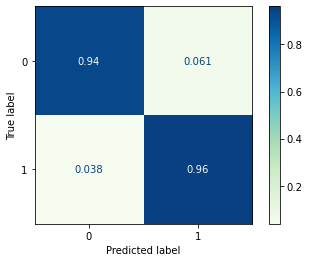

In [47]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print ("Random Forest:")
predictions = model.predict(X_test)

#calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))  
#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu")
plt.show() 

In [48]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)


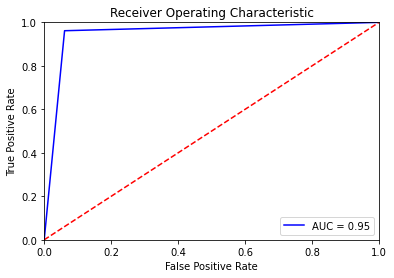

In [49]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


**CONCLUSION**

The model has a ver good prediction as well as very good acuracy 95.13 %

### MODEL 3 : GaussianNB()<a class="anchor" id="SM3"></a>

Gaussian NB:
The accuracy of the model on test set is:  0.6563282746426993
Kappa:  0.310468802564023
ROC-AUC score:  0.6547502718630862
F1 score:  0.7180757841300538
Confusion Matrix - raw:


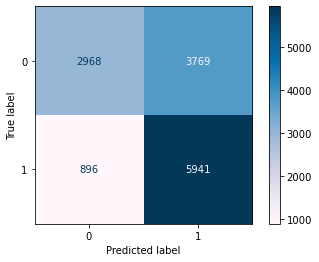

Confusion Matrix - normalised row-wise:


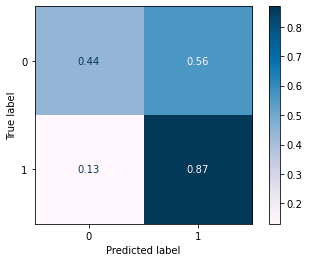

In [50]:
model = GaussianNB()
model.fit(X_train, y_train)
print ("Gaussian NB:")
predictions = model.predict(X_test)

#calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))  
#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "PuBu")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "PuBu")
plt.show() 

In [51]:
# calculate the AOC
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

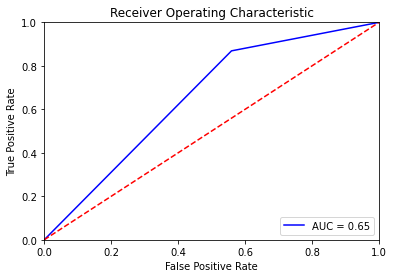

In [52]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### CONCLUSION  <a class="anchor" id="V"></a>

The model got better at prediction but a drop in acuracy 65.63 % but better than the Regression Model

**VALIDATION** : Comparing the Models acuracy, AOC , F1 score, Kappa

    
|Qualification               | Acuracy    | AOC/RUC | F1-Score| kappa |
| -----------                | -----------| --------| --------| ----- |
| Logistic regression        | 94.61 %    |  50 %   |   0     | 0     |
| Randomn Forest Classifier  | 94.59 %    |  50 %   |   0.51% | 0.4 % |
| Gaussian NB                | 94.30 %    |  58.8 % |   3.75% | 2.8 % |
| **After SMOTE**            |            |         |         |       |
| Logistic regression        | 72.04 %    | 72.03 % |  72.53% | 44 %  |
| Randomn Forest Classifier  | 95.04 %    | 95.03 % |  95.23% | 90.08%|
| Gaussian NB                | 65.47 %    | 65.47 % |  71.8 % | 31.05%|


**CONCLUSION**

The Randomn Forest Classifier has the best acuracy and the model will be good in prediction since it has high AUC, F1 and Kappa score 